Hamza Mhadi 


Time Series Homework 

In [124]:
#initial imports 

import numpy as np 
import pandas as pd 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [125]:
 # Futures contract on the Yen-dollar exchange rate:
# This is the continuous chain of the futures contracts that are 1 month to expiration

yen_futures = pd.read_csv("yen.csv", infer_datetime_format=True, parse_dates=True, index_col="Date")

yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1976-08-02,3398.0,3401.0,3398.0,3401.0,NaN,3401.0,2,1
1976-08-03,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-04,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-05,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1
1976-08-06,3401.0,3401.0,3401.0,3401.0,NaN,3401.0,0,1


In [126]:
#Trim the dataset to begin on January 1st, 1990 

yen_futures = yen_futures.loc["1990-01-01":, :]
yen_futures.head()

,Open,High,Low,Last,Change,Settle,Volume,Previous Day Open Interest
Date,,,,,,,,
1990-01-02,6954.0,6954.0,6835.0,6847.0,NaN,6847.0,48336,51473
1990-01-03,6877.0,6910.0,6865.0,6887.0,NaN,6887.0,38206,53860
1990-01-04,6937.0,7030.0,6924.0,7008.0,NaN,7008.0,49649,55699
1990-01-05,6952.0,6985.0,6942.0,6950.0,NaN,6950.0,29944,53111
1990-01-08,6936.0,6972.0,6936.0,6959.0,NaN,6959.0,19763,52072


Return Forecasting: Initial Time Series Plotting 

<AxesSubplot:title={'center':'Yen Futures Settle Prices'}, xlabel='Date'>

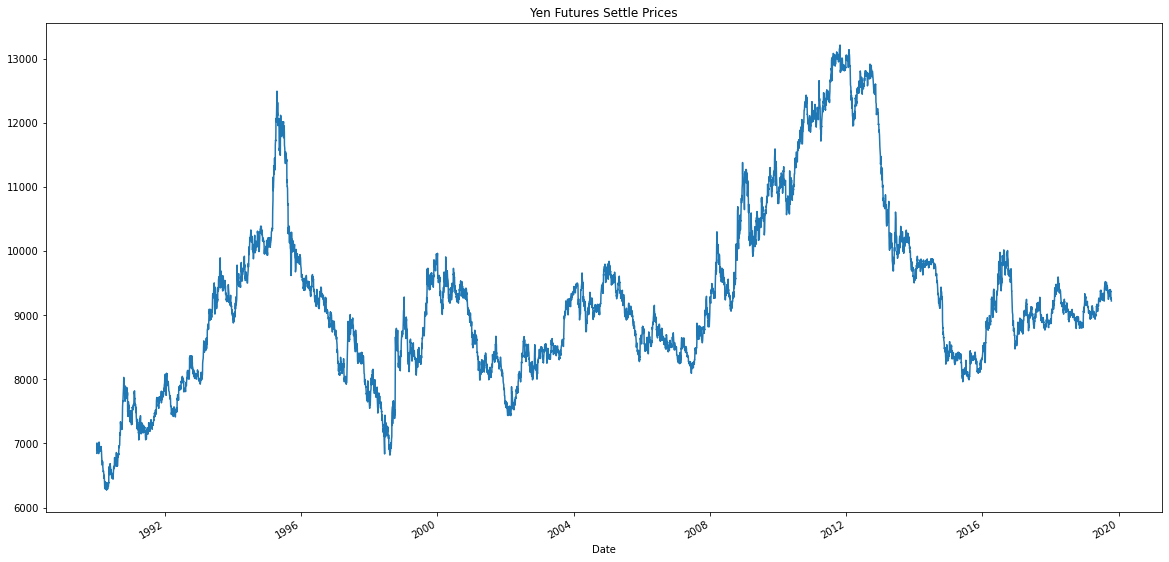

In [127]:
#Plotting the Settle price. Do you see any patterns, long-term and/or short? 
yen_futures.Settle.plot(figsize= (20,10), title="Yen Futures Settle Prices")

Decomposition Using a Hodrick - Prescott Filter

Using a Hodrick-Prescott Filter, decompose the Settle price into a trend and noise

In [128]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the "Settle" price into two seperate series: 

settle_noise, settle_trend = sm.tsa.filters.hpfilter(yen_futures["Settle"])

In [129]:
#Create a dataframe of just the settle price, and add columns for "noise" and "trend" series from above

df = yen_futures

del df["Open"]
del df["Low"]
del df["Last"]
del df["Change"]
del df["Previous Day Open Interest"]
del df["High"]
del df["Volume"]

df["Noise"] = settle_noise
df["Trend"] = settle_trend

df.tail()

,Settle,Noise,Trend
Date,,,
2019-10-09,9338.0,24.939247,9313.060753
2019-10-10,9303.5,-5.868559,9309.368559
2019-10-11,9251.0,-54.454594,9305.454594
2019-10-14,9265.0,-36.423060,9301.423060
2019-10-15,9221.5,-75.844123,9297.344123


In [130]:
df.head()

,Settle,Noise,Trend
Date,,,
1990-01-02,6847.0,-61.503967,6908.503967
1990-01-03,6887.0,-21.799756,6908.799756
1990-01-04,7008.0,98.942896,6909.057104
1990-01-05,6950.0,40.776052,6909.223948
1990-01-08,6959.0,49.689938,6909.310062


<AxesSubplot:title={'center':'Settle vs Trend'}, xlabel='Date'>

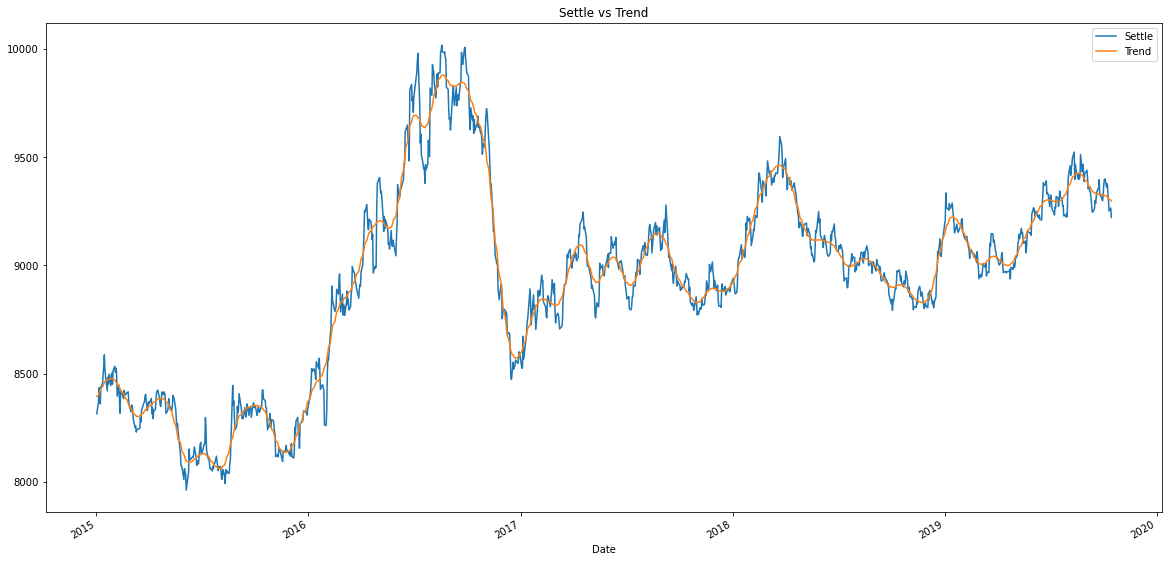

In [131]:
#Plot the Settle Price vs the trend for 2015 to present 

#Step 1: Slice the data to 2015 to present 
df2 = df.loc["2015-01-01":, : ]

#Step 2: Drop the "Noise" column online
df2 = df2.drop(["Noise"], axis = 1)

#Step 3: Plot the chart 

df2.plot.line(figsize=(20,10), title= "Settle vs Trend")

<AxesSubplot:title={'center':'Noise'}, xlabel='Date'>

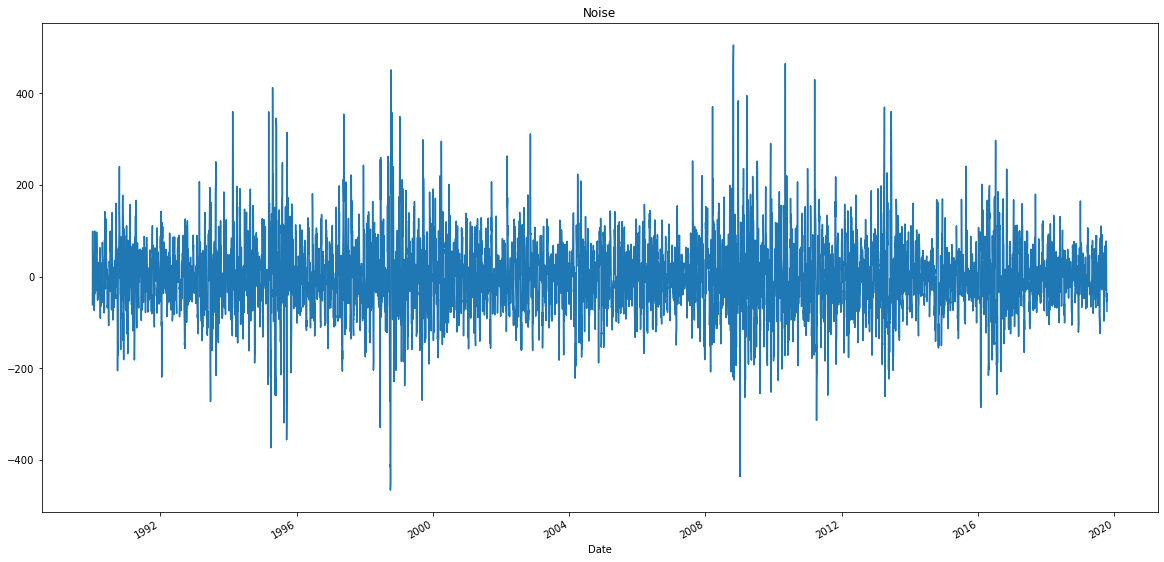

In [132]:
#Plot the Settle Noise 

df["Noise"].plot.line(figsize=(20,10), title="Noise")

Forecasting Returns using an ARMA model

In [133]:
# Create a series using "Settle" price percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (yen_futures[["Settle"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Settle
Date,
2019-10-09,-0.410601
2019-10-10,-0.369458
2019-10-11,-0.564304
2019-10-14,0.151335
2019-10-15,-0.469509


In [134]:
from statsmodels.tsa.arima_model import ARMA

#Estimate ARMA model using statsmodels (use order(2,1))
model = ARMA(returns.values, order=(2,1))

#Fit the model and assign it a variable called results 
results = model.fit()

In [135]:
#Output model summary results 

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                 7514
Model:                     ARMA(2, 1)   Log Likelihood               -7894.071
Method:                       css-mle   S.D. of innovations              0.692
Date:                Sat, 20 Feb 2021   AIC                          15798.142
Time:                        13:07:46   BIC                          15832.765
Sample:                             0   HQIC                         15810.030
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0063      0.008      0.804      0.422      -0.009       0.022
ar.L1.y       -0.3062      1.277     -0.240      0.811      -2.810       2.197
ar.L2.y       -0.0019      0.019     -0.099      0.921      -0.040       0.036
ma.L1.y        0.2946      1.277      0.231      0.818      -2.209       2.798
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.3352           +0.0000j            3.3352            0.5000
AR.2         -157.2096           +0.0000j          157.2096            0.5000
MA.1           -3.3941           +0.0000j            3.3941            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Days Returns Forecast'}>

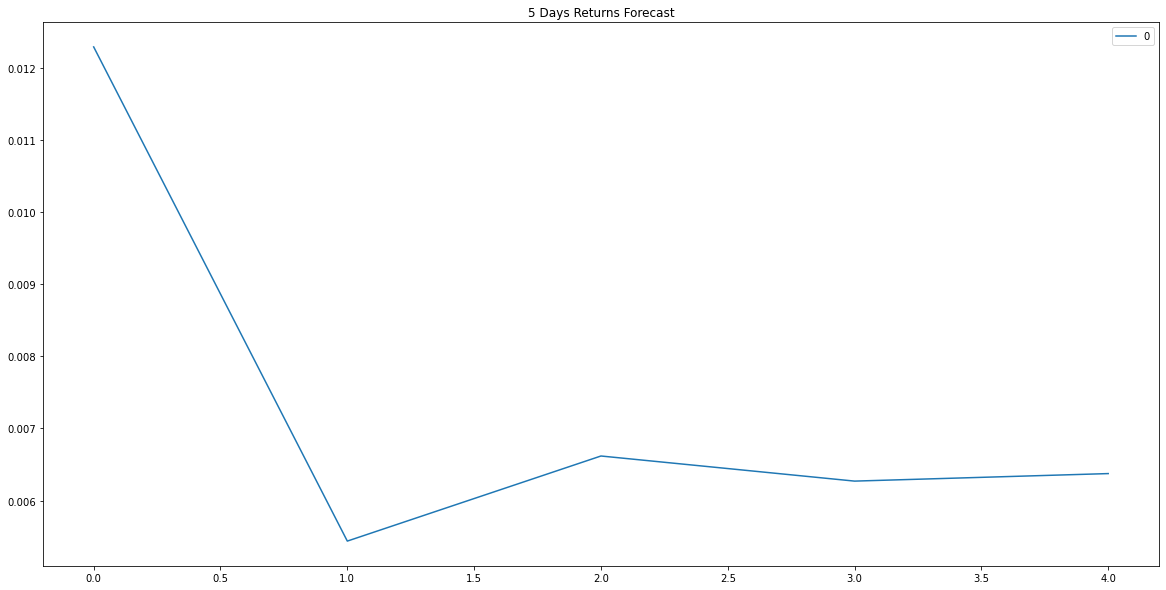

In [136]:
#Plot the 5 Days Returns Forecast 

pd.DataFrame(results.forecast(steps=5)[0]).plot(title="5 Days Returns Forecast", figsize=(20,10))

forecasting the Settle Price using an ARIMA Model

In [157]:
from statsmodels.tsa.arima_model import ARIMA

moddel = ARIMA(df.Settle.values, order=(5,1,1))
rezults = moddel.fit()

In [158]:
#Output model summary results 

rezults.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                 7514
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -41944.619
Method:                       css-mle   S.D. of innovations             64.281
Date:                Sat, 20 Feb 2021   AIC                          83905.238
Time:                        13:19:20   BIC                          83960.635
Sample:                             1   HQIC                         83924.259
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3161      0.700      0.452      0.652      -1.056       1.688
ar.L1.D.y      0.2821      0.699      0.403      0.687      -1.088       1.653
ar.L2.D.y      0.0007      0.016      0.043      0.966      -0.030       0.032
ar.L3.D.y     -0.0126      0.012     -1.032      0.302      -0.037       0.011
ar.L4.D.y     -0.0137      0.015     -0.889      0.374      -0.044       0.016
ar.L5.D.y     -0.0012      0.018     -0.064      0.949      -0.036       0.034
ma.L1.D.y     -0.2972      0.699     -0.425      0.671      -1.667       1.073
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8917           -1.3787j            2.3408           -0.1002
AR.2            1.8917           +1.3787j            2.3408            0.1002
AR.3           -2.2698           -3.0207j            3.7785           -0.3526
AR.4           -2.2698           +3.0207j            3.7785            0.3526
AR.5          -11.0610           -0.0000j           11.0610           -0.5000
MA.1            3.3652           +0.0000j            3.3652            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Days Returns Forecast'}>

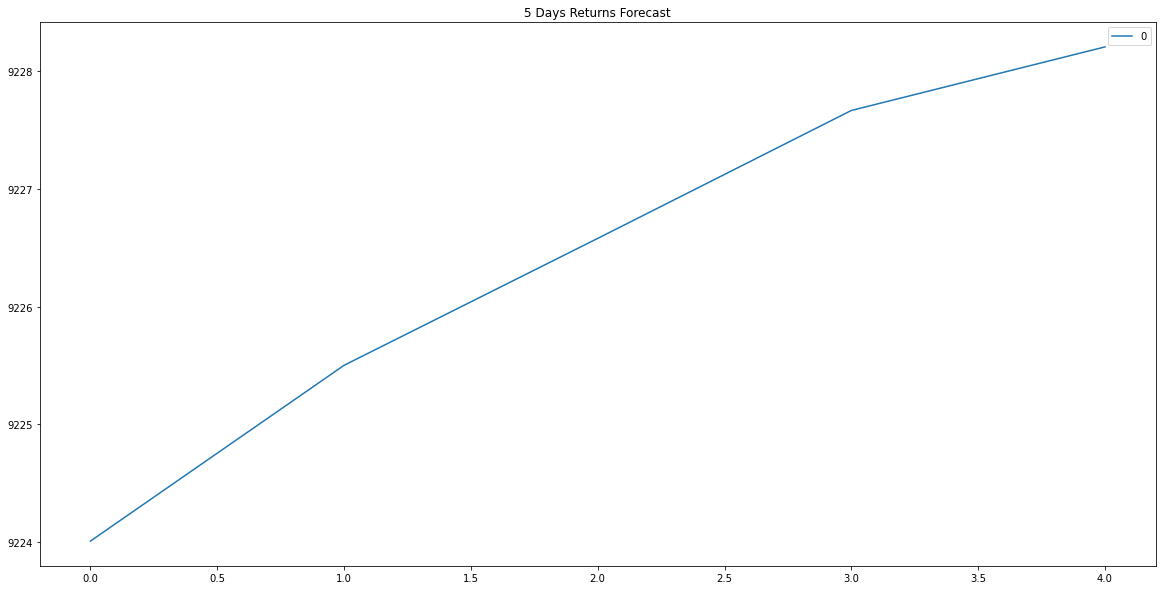

In [159]:
# Plot the 5 Day Price Forecast 

pd.DataFrame(rezults.forecast(steps=5)[0]).plot(title="5 Days Returns Forecast", figsize=(20,10))

Volatility Forecasting with GARCH

In [161]:
import arch
from arch import arch_model

In [165]:
#Estimate GARCH model: 

mod = arch_model(returns, mean="Zero", vol="GARCH", p=2, q=1 )


In [168]:
#Fit the Garch Model

res = mod.fit(disp="off")

In [169]:
#Summarize the model

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Settle   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7461.93
Distribution:                  Normal   AIC:                           14931.9
Method:            Maximum Likelihood   BIC:                           14959.6
                                        No. Observations:                 7514
Date:                Sat, Feb 20 2021   Df Residuals:                     7514
Time:                        13:27:25   Df Model:                            0
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      4.2896e-03  2.057e-03      2.085  3.708e-02  [2.571e-04,8.322e-03]
alpha[1]       0.0381  1.282e-02      2.970  2.974e-03  [1.295e-02,6.321e-02]
alpha[2]       0.0000  1.703e-02      0.000      1.000 [-3.338e-02,3.338e-02]
beta[1]        0.9536  1.420e-02     67.135      0.000      [  0.926,  0.981]
=============================================================================

Covariance estimator: robust
"""

In [171]:
#Find the Last day of the dataset 
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2019-10-15'

In [172]:
#Greate a 5 day forecast of volatility 
forecast_horizon = 5 

#Start the forecast using the last_day calculated above 
forecasts = res.forecast(start="2019-10-15", horizon=forecast_horizon)
forecasts

In [173]:
#Annualize the forecast 
intermediate = np.sqrt(forecasts.variance.dropna()*252)
intermediate

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2019-10-15,7.434048,7.475745,7.516867,7.557426,7.597434


In [174]:
#Transpose the forecast so that it is easier to plot 

final = intermediate.dropna().T
final.head()

Date,2019-10-15
h.1,7.434048
h.2,7.475745
h.3,7.516867
h.4,7.557426
h.5,7.597434


<AxesSubplot:title={'center':'5 Day Forecast of Volatility'}>

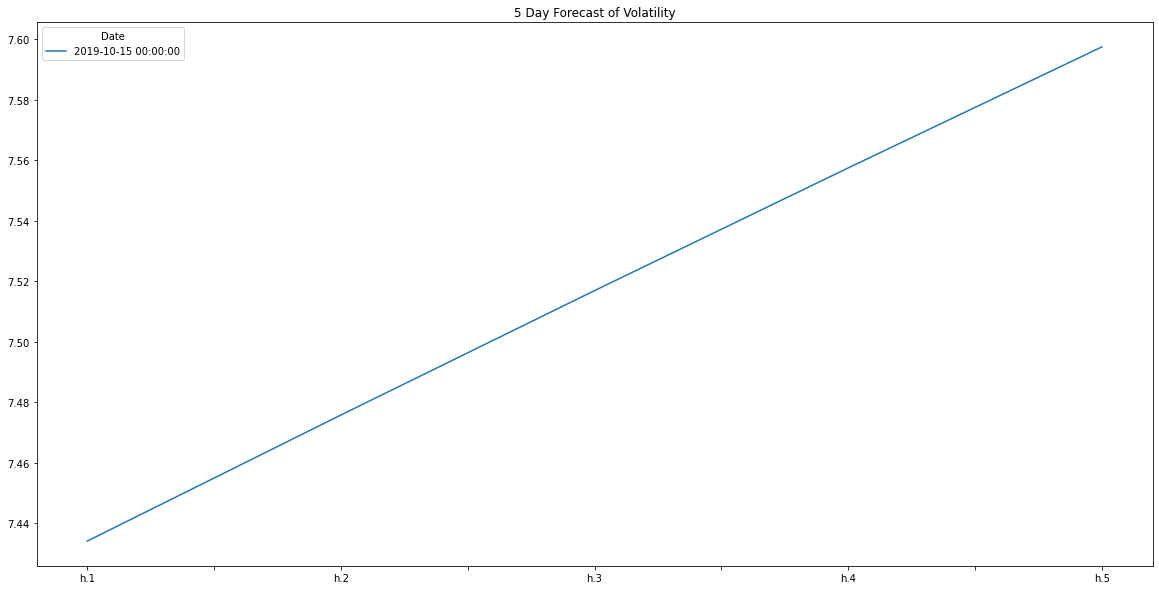

In [175]:
final.plot.line(figsize=(20,10), title="5 Day Forecast of Volatility")

Conclusions

Q: Based on your time series analysis, would you buy the yen now? 


A: No

Q: Is the risk of the yen expected to increase or decrease

A: Increase

Q: Based on the model evaluation, would you feel confident in using these models for trading?

A: No